## Find the stock price for the following companies ( Google, Royal Dutch Shell,Apple, JPMorgan).

In [1]:
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import csv
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, preprocessing,utils
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB

from keras.layers import Conv1D, Conv2D, MaxPooling2D 
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
import numpy as np







Using TensorFlow backend.


In [0]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


In [0]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [0]:
def to_sequences(seq_size, data, label):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        print(i)
        window = data[i:(i+seq_size)].values
        after_window = label[i+seq_size]
        print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Royal Dutch Shell

In [0]:
filename_read_ap = os.path.join("drive/My Drive/p4/RDS-B.csv")

In [0]:
df_stock_ap = pd.read_csv(filename_read_ap)

In [0]:
df_LSTM_RD = pd.read_csv("drive/My Drive/p4/RDS-B.csv")

In [12]:
df_LSTM_RD=df_LSTM_RD.drop(['Date', 'Adj Close'], axis=1)
df_LSTM_RD.head()

Open      High       Low     Close  Volume
0  5.993333  6.138333  5.993333  6.138333   21200
1  6.138333  6.138333  5.993333  6.138333   13400
2  6.186666  6.235000  6.186666  6.210834    6700
3  6.210834  6.259167  6.186666  6.186666    5600
4  6.065834  6.065834  5.945000  5.993333   13900

In [13]:
df_LSTM_RD.shape

(9744, 5)

In [0]:
df_close_lstm_rd = df_LSTM_RD['Close']

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
df_LSTM_RD = scaler.fit_transform(df_LSTM_RD)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [16]:
percent70 = int(len(df_LSTM_RD)* 0.70)
percent30 = len(df_LSTM_RD) - percent70
print(percent70)
print(percent30)

6820
2924


In [17]:
train = df_LSTM_RD[0:percent70]
test = df_LSTM_RD[percent70:len(df_LSTM_RD)]

print(train.shape)
print(test.shape)

(6820, 5)
(2924, 5)


In [18]:
train_close = df_close_lstm_rd[0:percent70].values
test_close =  df_close_lstm_rd[percent70:len(df_close_lstm_rd)].values
print(train_close.shape)
print(test_close.shape)

(6820,)
(2924,)


In [0]:
import numpy as np

def to_sequences(seq_size,data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data[i:(i+seq_size)]
        #print(window)
        after_window = close[i+seq_size]
        #print(after_window)
        #after_window = after_window[4]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)



In [20]:
SEQUENCE_SIZE = 7
#print(x_train[0:2])
#print("Shape of x_train: {}".format(x_train.shape))
x_train,y_train = to_sequences(SEQUENCE_SIZE,train,train_close)
x_test,y_test = to_sequences(SEQUENCE_SIZE,test,test_close)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (6812, 7, 1, 5)
Shape of x_test: (2916, 7, 1, 5)
Shape of y_train: (6812,)
Shape of y_test: (2916,)


In [0]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[3]))

In [0]:
checkpointer_lstm = ModelCheckpoint(filepath="./best_weights_lstm.hdf5", verbose=1, save_best_only=True)

In [23]:
for i in range(5):
    print(i)
    
    print('Build model...')
    model_lstm = Sequential()

    model_lstm.add(LSTM(64, input_shape=(7, 5),activation="relu"))
    model_lstm.add(Dense(32, activation="relu"))
    model_lstm.add(Dense(1))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model_lstm.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_lstm],verbose=2, epochs=10)  

 
print()
model_lstm.load_weights('./best_weights_lstm.hdf5')

0
Build model...
Instructions for updating:
Colocations handled automatically by placer.
Train...
Instructions for updating:
Use tf.cast instead.
Train on 6812 samples, validate on 2916 samples
Epoch 1/10
 - 3s - loss: 331.9269 - val_loss: 60.2255

Epoch 00001: val_loss improved from inf to 60.22551, saving model to ./best_weights_lstm.hdf5
Epoch 2/10
 - 1s - loss: 1.8415 - val_loss: 14.6180

Epoch 00002: val_loss improved from 60.22551 to 14.61799, saving model to ./best_weights_lstm.hdf5
Epoch 3/10
 - 1s - loss: 1.4882 - val_loss: 12.4754

Epoch 00003: val_loss improved from 14.61799 to 12.47539, saving model to ./best_weights_lstm.hdf5
Epoch 4/10
 - 1s - loss: 1.4020 - val_loss: 16.3956

Epoch 00004: val_loss did not improve from 12.47539
Epoch 5/10
 - 1s - loss: 1.3875 - val_loss: 7.4669

Epoch 00005: val_loss improved from 12.47539 to 7.46693, saving model to ./best_weights_lstm.hdf5
Epoch 6/10
 - 1s - loss: 1.5224 - val_loss: 8.2374

Epoch 00006: val_loss did not improve from 7.4

In [25]:
pred = model_lstm.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))
score_r2_app= r2_score(pred,y_test)
print("Score (R2): {}".format(score_r2_app))

Score (RMSE): 2.26204088007239
Score (R2): 0.9558049233788545


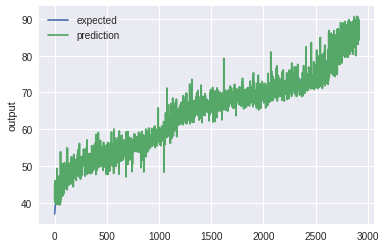

In [26]:
chart_regression(pred.flatten(),y_test,sort=True)

##Apple

In [0]:
filename_read_ap = os.path.join("drive/My Drive/p4/AAPL.csv")

In [0]:
df_stock_ap = pd.read_csv(filename_read_ap)

In [36]:
df_stock_ap.head()

Date      Open      High       Low     Close  Adj Close       Volume
0  1980-12-12  0.513393  0.515625  0.513393  0.513393   0.023186  117258400.0
1  1980-12-15  0.488839  0.488839  0.486607  0.486607   0.021977   43971200.0
2  1980-12-16  0.453125  0.453125  0.450893  0.450893   0.020364   26432000.0
3  1980-12-17  0.462054  0.464286  0.462054  0.462054   0.020868   21610400.0
4  1980-12-18  0.475446  0.477679  0.475446  0.475446   0.021473   18362400.0

In [37]:
df_stock_ap=df_stock_ap.drop(['Date', 'Adj Close'], axis=1)
df_stock_ap.head()

Open      High       Low     Close       Volume
0  0.513393  0.515625  0.513393  0.513393  117258400.0
1  0.488839  0.488839  0.486607  0.486607   43971200.0
2  0.453125  0.453125  0.450893  0.450893   26432000.0
3  0.462054  0.464286  0.462054  0.462054   21610400.0
4  0.475446  0.477679  0.475446  0.475446   18362400.0

In [38]:
df_stock_ap.shape

(9556, 5)

In [0]:
df_close_ap = df_stock_ap['Close']

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
df_stock_ap = scaler.fit_transform(df_stock_ap)

In [41]:
percent70 = int(len(df_stock_ap)* 0.70)
percent30 = len(df_stock_ap) - percent70
print(percent70)
print(percent30)

6689
2867


In [42]:
train = df_stock_ap[0:percent70]
test = df_stock_ap[percent70:len(df_stock_ap)]

print(train.shape)
print(test.shape)

(6689, 5)
(2867, 5)


In [43]:
train_close = df_close_ap[0:percent70].values
test_close =  df_close_ap[percent70:len(df_close_ap)].values
print(train_close.shape)
print(test_close.shape)

(6689,)
(2867,)


In [0]:
import numpy as np

def to_sequences(seq_size,data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        #print(i)
        window = data[i:(i+seq_size)]
        #print(window)
        after_window = close[i+seq_size]
        #print(after_window)
        #after_window = after_window[4]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [45]:
SEQUENCE_SIZE = 7

#print(x_train[0:2])
#print("Shape of x_train: {}".format(x_train.shape))
x_train,y_train = to_sequences(SEQUENCE_SIZE,train,train_close)
x_test,y_test = to_sequences(SEQUENCE_SIZE,test,test_close)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (6681, 7, 1, 5)
Shape of x_test: (2859, 7, 1, 5)
Shape of y_train: (6681,)
Shape of y_test: (2859,)


In [0]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[3]))

In [0]:
checkpointer_lstm = ModelCheckpoint(filepath="./best_weights_lstm.hdf5", verbose=1, save_best_only=True)

In [51]:
for i in range(5):
    print(i)
    
    print('Build model...')
    model_lstm = Sequential()

    model_lstm.add(LSTM(64,dropout=0.1, recurrent_dropout=0.1, input_shape=(7, 5),activation="relu"))
    model_lstm.add(Dense(32, activation="relu"))
    model_lstm.add(Dense(1))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')
    model_lstm.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_lstm],verbose=2, epochs=10)  

 
print()
model_lstm.load_weights('./best_weights_lstm.hdf5')

0
Build model...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train...
Train on 6681 samples, validate on 2859 samples
Epoch 1/10
 - 5s - loss: nan - val_loss: nan

Epoch 00001: val_loss did not improve from inf
Epoch 2/10
 - 2s - loss: nan - val_loss: nan

Epoch 00002: val_loss did not improve from inf
Epoch 3/10
 - 2s - loss: nan - val_loss: nan

Epoch 00003: val_loss did not improve from inf
Epoch 4/10
 - 2s - loss: nan - val_loss: nan

Epoch 00004: val_loss did not improve from inf
Epoch 5/10
 - 2s - loss: nan - val_loss: nan

Epoch 00005: val_loss did not improve from inf
Epoch 00005: early stopping
1
Build model...
Train...
Train on 6681 samples, validate on 2859 samples
Epoch 1/10
 - 5s - loss: nan - val_loss: nan

Epoch 00001: val_loss did not improve from inf
Epoch 2/10
 - 2s - loss: nan - val_loss: nan

Epoch 00002: val_loss did not improve from inf
Epoch 3/10
 - 2s - loss: nan - val_loss: nan

Epoch 00003:

In [52]:
pred = model_lstm.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))
score_r2_app= r2_score(pred,y_test)
print("Score (R2): {}".format(score_r2_app))

Score (RMSE): 58.003585994818856
Score (R2): -8.793347648742149


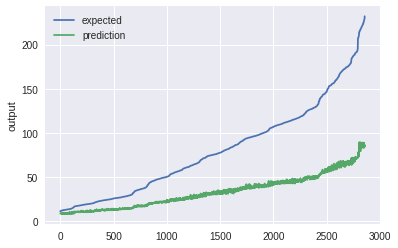

In [53]:
chart_regression(pred.flatten(),y_test,sort=True)

##Google 

In [0]:
filename_read_go = os.path.join("drive/My Drive/p4/GOOG.csv")

In [0]:
df_stock_go = pd.read_csv(filename_read_go)

In [0]:
df_stock_go.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  49.676899  51.693783  47.669952  49.845802  49.845802  44994500
1  2004-08-20  50.178635  54.187561  49.925285  53.805050  53.805050  23005800
2  2004-08-23  55.017166  56.373344  54.172661  54.346527  54.346527  18393200
3  2004-08-24  55.260582  55.439419  51.450363  52.096165  52.096165  15361800
4  2004-08-25  52.140873  53.651051  51.604362  52.657513  52.657513   9257400

In [0]:
df_stock_go=df_stock_go.drop(['Date', 'Adj Close'], axis=1)
df_stock_go.head()

Open       High        Low      Close    Volume
0  49.676899  51.693783  47.669952  49.845802  44994500
1  50.178635  54.187561  49.925285  53.805050  23005800
2  55.017166  56.373344  54.172661  54.346527  18393200
3  55.260582  55.439419  51.450363  52.096165  15361800
4  52.140873  53.651051  51.604362  52.657513   9257400

In [0]:
#ZScore for Numeric columns
def Z_score(column):
    df_stock_go[column] = zscore(df_stock_go[column])

In [0]:
num_col_zscore = ['Open','High','Low','Volume']
for i in num_col_zscore:
    Z_score(i)

In [0]:
df_stock_go.head()

Open      High       Low      Close    Volume
0 -1.335030 -1.331629 -1.337644  49.845802  4.533881
1 -1.333287 -1.323028 -1.329748  53.805050  1.870399
2 -1.316475 -1.315489 -1.314876  54.346527  1.311677
3 -1.315630 -1.318710 -1.324408  52.096165  0.944485
4 -1.326469 -1.324878 -1.323869  52.657513  0.205062

In [0]:
x,y=to_xy(df_stock_go,"Close")

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [0]:
checkpointer_relu = ModelCheckpoint(filepath="./best_weights_relu_2l.hdf5", verbose=1, save_best_only=True)


In [0]:
# relu adam 2 layers
for i in range(3):
    print(i)
    
    # Build network
    model_relu = Sequential()
    model_relu.add(Dense(60, input_dim=x_train.shape[1], activation='relu')) 
    model_relu.add(Dense(30, activation='relu')) # Hidden 2
    model_relu.add(Dense(1)) # Output
    model_relu.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_relu.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer_relu],verbose=2,epochs=100) 
    
print('Training finished...Loading the best model') 
print()
model_relu.load_weights('./best_weights_relu_2l.hdf5')


0
Train on 2504 samples, validate on 1074 samples
Epoch 1/100
 - 3s - loss: 276147.6933 - val_loss: 251496.4574

Epoch 00001: val_loss improved from inf to 251496.45743, saving model to ./best_weights_relu_2l.hdf5
Epoch 2/100
 - 0s - loss: 262517.2531 - val_loss: 225256.6965

Epoch 00002: val_loss improved from 251496.45743 to 225256.69652, saving model to ./best_weights_relu_2l.hdf5
Epoch 3/100
 - 0s - loss: 213653.0346 - val_loss: 159718.8914

Epoch 00003: val_loss improved from 225256.69652 to 159718.89135, saving model to ./best_weights_relu_2l.hdf5
Epoch 4/100
 - 0s - loss: 130345.0249 - val_loss: 80067.5792

Epoch 00004: val_loss improved from 159718.89135 to 80067.57919, saving model to ./best_weights_relu_2l.hdf5
Epoch 5/100
 - 0s - loss: 53453.1564 - val_loss: 25779.3084

Epoch 00005: val_loss improved from 80067.57919 to 25779.30842, saving model to ./best_weights_relu_2l.hdf5
Epoch 6/100
 - 0s - loss: 15873.4125 - val_loss: 9759.7031

Epoch 00006: val_loss improved from 2577

In [0]:
pred_relu = model_relu.predict(x_test)
print("Shape: {}".format(pred_relu.shape))


Shape: (1074, 1)


In [0]:
# Measure RMSE error.  RMSE is common for regression.
score_relu = np.sqrt(mean_squared_error(y_test,pred_relu))
print("Final score (RMSE): {}".format(score_relu))
print('R2 score: %.2f' % r2_score(y_test, pred_relu))

Final score (RMSE): 4.404630184173584
R2 score: 1.00


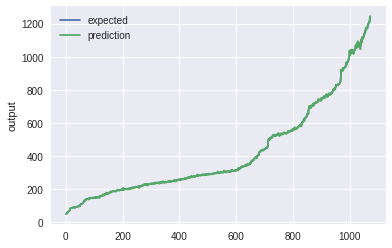

In [0]:
chart_regression(pred_relu.flatten(),y_test)

##JP Morgan

In [0]:
filename_read_ap = os.path.join("drive/My Drive/p4/JPM.csv")

In [0]:
df_stock_jp = pd.read_csv(filename_read_ap)

In [0]:
df_stock_jp.head()

Date      Open      High       Low     Close  Adj Close  Volume
0  1980-03-17  5.018518  5.129630  5.018518  5.037037   0.304709   62400
1  1980-03-18  5.037037  5.111111  5.037037  5.074074   0.306950   63900
2  1980-03-19  5.111111  5.166667  5.111111  5.148148   0.311431   40500
3  1980-03-20  5.148148  5.148148  5.092593  5.111111   0.309190   18900
4  1980-03-21  5.111111  5.222222  5.111111  5.222222   0.315912   97200

In [0]:
df_stock_jp=df_stock_jp.drop(['Date', 'Adj Close'], axis=1)
df_stock_jp.head()

Open      High       Low     Close  Volume
0  5.018518  5.129630  5.018518  5.037037   62400
1  5.037037  5.111111  5.037037  5.074074   63900
2  5.111111  5.166667  5.111111  5.148148   40500
3  5.148148  5.148148  5.092593  5.111111   18900
4  5.111111  5.222222  5.111111  5.222222   97200

In [0]:
close_df_jp=df_stock_jp[['Close']]

In [0]:
close_df_jp[:5]

Close
0  5.037037
1  5.074074
2  5.148148
3  5.111111
4  5.222222

In [0]:
#ZScore for Numeric columns
def Z_score(column):
    df_stock_jp[column] = zscore(df_stock_jp[column])

In [0]:
num_col_zscore = ['Open','High','Close','Low','Volume']
for i in num_col_zscore:
    Z_score(i)

In [0]:
df_stock_jp.head()

Open      High       Low     Close    Volume
0 -1.169690 -1.170982 -1.163382 -1.169156 -0.673087
1 -1.168907 -1.171758 -1.162593 -1.167591 -0.673001
2 -1.165777 -1.169431 -1.159435 -1.164460 -0.674348
3 -1.164212 -1.170207 -1.160224 -1.166026 -0.675591
4 -1.165777 -1.167104 -1.159435 -1.161330 -0.671083

In [0]:
data_rows, data_cols, data_channels = 1,7,5

In [0]:
input_shape = (data_rows, data_cols, data_channels)

In [0]:
def to_sequences(seq_size, data, label):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        print(i)
        window = data[i:(i+seq_size)].values
        after_window = label[i+seq_size]
        print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [0]:
SEQUENCE_SIZE = 7
x,y = to_sequences(SEQUENCE_SIZE,df_stock_jp,close_df_jp['Close'])

[[-1.12508662 -1.12987171 -1.1199572  -1.12689298 -0.67331157]
 [-1.12665164 -1.13142306 -1.12153629 -1.12689298 -0.67362247]
 [-1.12586915 -1.12832037 -1.11916767 -1.12532767 -0.67222342]
 [-1.12508662 -1.12909602 -1.1199572  -1.124545   -0.66968442]
 [-1.12430409 -1.12909602 -1.1199572  -1.124545   -0.67362247]
 [-1.12430409 -1.12909602 -1.12153629 -1.124545   -0.66926989]
 [-1.12430409 -1.13064737 -1.1199572  -1.124545   -0.66945988]] - 6.0740739999999995
155
[[-1.12665164 -1.13142306 -1.12153629 -1.12689298 -0.67362247]
 [-1.12586915 -1.12832037 -1.11916767 -1.12532767 -0.67222342]
 [-1.12508662 -1.12909602 -1.1199572  -1.124545   -0.66968442]
 [-1.12430409 -1.12909602 -1.1199572  -1.124545   -0.67362247]
 [-1.12430409 -1.12909602 -1.12153629 -1.124545   -0.66926989]
 [-1.12430409 -1.13064737 -1.1199572  -1.124545   -0.66945988]
 [-1.12430409 -1.12832037 -1.1183781  -1.12532767 -0.67401973]] - 6.0740739999999995
156
[[-1.12586915 -1.12832037 -1.11916767 -1.12532767 -0.67222342]
 [-

In [0]:
x.shape

(9737, 7, 5)

In [0]:
y.shape

(9737,)

In [0]:
x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(x,y, test_size=0.3, random_state=42)

In [0]:
x_train_cnn.shape

(6815, 7, 5)

In [0]:
x_test_cnn.shape

(2922, 7, 5)

In [0]:
y_train_cnn.shape

(6815,)

In [0]:
y_test_cnn.shape

(2922,)

In [0]:
x_train_cnn = x_train_cnn.reshape(x_train_cnn.shape[0], data_rows, data_cols, data_channels)
x_test_cnn = x_test_cnn.reshape(x_test_cnn.shape[0], data_rows, data_cols,data_channels)

In [0]:
checkpointer_cnn = ModelCheckpoint(filepath="./best_weights_stock_cnn_es.hdf5", verbose=1, save_best_only=True)

In [0]:
for i in range(5):
    print(i)
    
    model_cnn = Sequential()
    model_cnn.add(Conv2D(32, kernel_size=(1, 5), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
    model_cnn.add(Conv2D(64, (1, 1), activation='relu'))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(10, activation='relu'))
    model_cnn.add(Dense(1))
    model_cnn.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model_cnn.fit(x_train_cnn, y_train_cnn, 
            batch_size=128, 
            callbacks=[monitor, checkpointer_cnn], 
            epochs=10, 
            verbose=2, 
            validation_data=(x_test_cnn, y_test_cnn))

print('Loading the best model') 
print()
model_cnn.load_weights('./best_weights_stock_cnn_es.hdf5')


0
Train on 6815 samples, validate on 2922 samples
Epoch 1/10
 - 3s - loss: 1167.1180 - val_loss: 287.8899

Epoch 00001: val_loss improved from inf to 287.88994, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 2/10
 - 0s - loss: 215.8857 - val_loss: 173.2395

Epoch 00002: val_loss improved from 287.88994 to 173.23954, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 3/10
 - 0s - loss: 113.9742 - val_loss: 61.5958

Epoch 00003: val_loss improved from 173.23954 to 61.59585, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 4/10
 - 0s - loss: 27.9580 - val_loss: 12.5230

Epoch 00004: val_loss improved from 61.59585 to 12.52301, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 5/10
 - 0s - loss: 8.0229 - val_loss: 5.5748

Epoch 00005: val_loss improved from 12.52301 to 5.57481, saving model to ./best_weights_stock_cnn_es.hdf5
Epoch 6/10
 - 0s - loss: 4.3077 - val_loss: 3.5533

Epoch 00006: val_loss improved from 5.57481 to 3.55334, saving model to ./best_weights_stoc

In [0]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 1, 3, 32)          832       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 3, 64)          2112      
_________________________________________________________________
flatten_5 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1930      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 11        
Total params: 4,885
Trainable params: 4,885
Non-trainable params: 0
_________________________________________________________________


In [0]:
pred_cnn = model_cnn.predict(x_test_cnn)
pred_cnn.flatten()

array([54.08709 , 14.568391, 10.358669, ..., 19.726482, 35.685974,
       59.12646 ], dtype=float32)

In [0]:
score_cnn= np.sqrt(mean_squared_error(pred_cnn,y_test_cnn))
print("Score (RMSE): {}".format(score_cnn))
score_cnn_r2= r2_score(pred_cnn,y_test_cnn)
print("Score (R2): {}".format(score_cnn_r2))

Score (RMSE): 1.2872031264936592
Score (R2): 0.9970459792473243


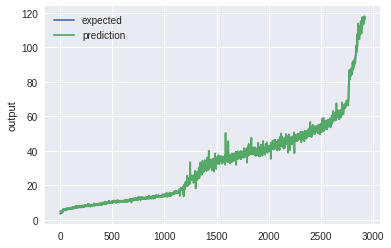

In [0]:
chart_regression(pred_cnn.flatten(),y_test_cnn)